# Potential Brewery Placement in St. Louis, Missouri

By: Paul Gilbert

## Introduction

St. Louis, Missouri is a well known location for restaurants and pubs. It is a large city (the largest in Missouri) where large amounts of people attend various places to eat and drink. This being the case, it is a great location for a company looking to start a brewing business. Some questions that would arise when attempting to find the right location for a business might be: 

1) Are there nearby breweries and pubs that may take potential business away?

2) Are the closeby restaurants that may entice people away?

3) Is my location far enough away from these businesses that I will be one of the only options to try?

4) Is my location close enough to the urban centers that business will have a high potential?

5) Am I along a major thoroughfare?

Information to answer these question would be quite valuable. This analysis will attempt to do so.

## Data

The data that will be used in this report are as follows:
    
    1) Data on Missouri Counties("https://data.mo.gov/Geography/Missouri-county-centroid-map/miam-vibb")
    
    2) Foursquare Developers Access to venue data: https://foursquare.com/

These free sources will allow us to obtain specific venue information in specific counties in Missouri.

## Methodology

### Library Import

In [248]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import json
from bs4 import BeautifulSoup
!pip install geopy 
from geopy.geocoders import Nominatim
import folium
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

print('Import Complete')



Import Complete


In [249]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\alexa\\GitProjects'

### Import Missouri County Data

In [250]:
Geospacial_Coordinates = pd.read_csv('Missouri_county_centroid_map.csv', sep = ',') 
print(Geospacial_Coordinates.shape)
col_list = ["NAME", "NAME2"]
df = pd.read_csv("Missouri_county_centroid_map.csv", usecols=col_list)

(115, 10)


### Create Data Table

In [251]:
Geo = pd.DataFrame(Geospacial_Coordinates)
Geo.head()

,NAME,NAME2,CNTY_FIPS,FIPS,COUNTYGNIS,CNTY_SEAT,GEOMETRY,CENTROID_LATLNG,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,Texas,TEXAS,215,29215,758560,Houston,"-91.9538,37.60105 -91.95315,37.60103 -91.93767...","(37.3170274447, -91.9648726076)",37.317027,-91.964873
1,New Madrid,NEW MADRID,143,29143,758526,New Madrid,"-89.57346,36.87004 -89.56703,36.87086 -89.5667...","(36.5944422607, -89.6518761696)",36.594442,-89.651876
2,Caldwell,CALDWELL,25,29025,758467,Kingston,"-93.8714,39.788 -93.7564,39.7825 -93.7564,39.6...","(39.6557391165, -93.9827862212)",39.655739,-93.982786
3,Dunklin,DUNKLIN,69,29069,758489,Kennett,"-90.13815,36.45593 -90.13971,36.45706 -90.1554...","(36.2717276794, -90.0910394294)",36.271728,-90.091039
4,Mississippi,MISSISSIPPI,133,29133,758521,Charleston,"-89.26356,37.0 -89.25899,37.01999 -89.28708,37...","(36.82787738, -89.2911243729)",36.827877,-89.291124


### Clean Data Table

In [252]:
col_list = ["NAME", "CENTROID_LATITUDE", "CENTROID_LONGITUDE"]

df = pd.read_csv("Missouri_county_centroid_map.csv", usecols=col_list)
df. head()


,NAME,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,Texas,37.317027,-91.964873
1,New Madrid,36.594442,-89.651876
2,Caldwell,39.655739,-93.982786
3,Dunklin,36.271728,-90.091039
4,Mississippi,36.827877,-89.291124


### Find Coordinates of Missouri

In [253]:
address = 'Missouri, USA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Missouri, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Missouri, USA are 38.7604815, -92.5617875.


### Create a Map of Missouri Counties

In [254]:
map_MO = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, county in zip(Geo['CENTROID_LATITUDE'], Geo['CENTROID_LONGITUDE'], Geo['NAME']):
    label = '{}'.format(county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='ORANGE',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_MO)  
    
map_MO

### Use Foursquare API

In [255]:
CLIENT_ID = '20YU4MCI13AFWJYD2DH10DOHAT0MCWFLWKPS4FA52VALZJ5G' # my Foursquare ID
CLIENT_SECRET = 'TWGAMJPEI3ARRMSMGQP3QP1RGGEWV0PYHF2NHSZBK4AK5MZN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 10000
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 20YU4MCI13AFWJYD2DH10DOHAT0MCWFLWKPS4FA52VALZJ5G
CLIENT_SECRET:TWGAMJPEI3ARRMSMGQP3QP1RGGEWV0PYHF2NHSZBK4AK5MZN


### Find Location of St. Charles, Missouri

In [256]:
county_latitude = Geo.loc[11, 'CENTROID_LATITUDE'] 
county_longitude = Geo.loc[11, 'CENTROID_LONGITUDE'] 
county_name = Geo.loc[11, 'NAME'] 
print('Latitude and longitude values of {} are {}, {}.'.format(county_name, 
                                                               county_latitude, 
                                                               county_longitude))


Latitude and longitude values of St. Charles are 38.7814033054, -90.6760283615.


### Create url using foursquare API to obtain json file

In [257]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    county_latitude, 
    county_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=20YU4MCI13AFWJYD2DH10DOHAT0MCWFLWKPS4FA52VALZJ5G&client_secret=TWGAMJPEI3ARRMSMGQP3QP1RGGEWV0PYHF2NHSZBK4AK5MZN&v=20180605&ll=38.7814033054,-90.6760283615&radius=10000&limit=250'

In [258]:
results = requests.get(url).json()

### Create function to return list of venue categories

In [259]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Create Data Table of Venues in St. Charles

In [260]:
venues = results['response']['groups'][0]['items']
stc = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
stc = stc.loc[:, filtered_columns]
stc['venue.categories'] = stc.apply(get_category_type, axis=1)
stc.columns = [col.split(".")[-1] for col in stc.columns]
stc.insert(0, 'County', 'St. Charles')
print('{} venues were returned by Foursquare.'.format(df.shape[0]))
stc

115 venues were returned by Foursquare.


,County,name,categories,lat,lng
0,St. Charles,Fritz's Frozen Custard,Ice Cream Shop,38.774568,-90.700572
1,St. Charles,Hobby Lobby,Fabric Shop,38.786564,-90.697787
2,St. Charles,QuikTrip,Convenience Store,38.800536,-90.677737
3,St. Charles,Firehouse Subs,Sandwich Place,38.780769,-90.699124
4,St. Charles,Chick-fil-A,Fast Food Restaurant,38.779072,-90.699277
5,St. Charles,Ethyl's Smokehouse & Saloon,BBQ Joint,38.800711,-90.693875
6,St. Charles,Stone Soup Cottage,French Restaurant,38.756328,-90.663471
7,St. Charles,Texas Roadhouse,Steakhouse,38.790275,-90.702075
8,St. Charles,Pantera's Pizza,Pizza Place,38.800205,-90.702206
9,St. Charles,Crazy Bowls and Wraps,American Restaurant,38.779510,-90.700702


### Create map of venues in St. Charles

In [261]:
stc_map = folium.Map(location=[county_latitude, county_longitude], zoom_start=12)

# add markers to map
for lat, lng, name, categories in zip(stc['lat'], stc['lng'], stc['name'], stc['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(stc_map) 
    
stc_map

In [262]:
stc['categories'].value_counts()

American Restaurant        6
Ice Cream Shop             6
Pharmacy                   5
Fast Food Restaurant       5
Pizza Place                5
Gym / Fitness Center       4
Grocery Store              3
Hardware Store             3
Breakfast Spot             3
Mexican Restaurant         3
Coffee Shop                3
Convenience Store          2
Furniture / Home Store     2
Italian Restaurant         2
Sporting Goods Shop        2
Bar                        2
Sandwich Place             2
Pub                        2
BBQ Joint                  2
Golf Course                2
Donut Shop                 2
Department Store           1
Liquor Store               1
Health & Beauty Service    1
Pool                       1
Chinese Restaurant         1
Discount Store             1
Shoe Store                 1
Brewery                    1
Beer Store                 1
Warehouse Store            1
Restaurant                 1
Butcher                    1
Sushi Restaurant           1
Irish Pub     

### Create another Dataset for St. Louis County

In [263]:
county_latitude = Geo.loc[27, 'CENTROID_LATITUDE'] 
county_longitude = Geo.loc[27, 'CENTROID_LONGITUDE'] 
county_name = Geo.loc[27, 'NAME'] 
print('Latitude and longitude values of {} are {}, {}.'.format(county_name, 
                                                               county_latitude, 
                                                               county_longitude))
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    county_latitude, 
    county_longitude, 
    radius, 
    LIMIT)
url
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
stl = json_normalize(venues) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
stl = stl.loc[:, filtered_columns]
stl['venue.categories'] = stl.apply(get_category_type, axis=1)
stl.columns = [col.split(".")[-1] for col in stl.columns]
stl.insert(0, 'County', 'St. Louis')
print('{} venues were returned by Foursquare.'.format(df.shape[0]))
stl.head()

Latitude and longitude values of St. Louis are 38.640403691799996, -90.4433622276.
115 venues were returned by Foursquare.


,County,name,categories,lat,lng
0,St. Louis,Vincent's Jewelers,Jewelry Store,38.671059,-90.442195
1,St. Louis,Trader Joe's,Grocery Store,38.671910,-90.436461
2,St. Louis,Shack Restaurant,American Restaurant,38.644129,-90.406004
3,St. Louis,MAC West,Gym / Fitness Center,38.612190,-90.453934
4,St. Louis,Sugo's,Italian Restaurant,38.633506,-90.410629


### Create another dataset for St. Louis City County

In [264]:
county_latitude = Geo.loc[56, 'CENTROID_LATITUDE'] 
county_longitude = Geo.loc[56, 'CENTROID_LONGITUDE'] 
county_name = Geo.loc[56, 'NAME'] 
print('Latitude and longitude values of {} are {}, {}.'.format(county_name, 
                                                               county_latitude, 
                                                               county_longitude))
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    county_latitude, 
    county_longitude, 
    radius, 
    LIMIT)
url
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
stlc = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
stlc = stlc.loc[:, filtered_columns]
stlc['venue.categories'] = stlc.apply(get_category_type, axis=1)
stlc.columns = [col.split(".")[-1] for col in stlc.columns]
stlc.insert(0, 'County', 'St. Louis City')
print('{} venues were returned by Foursquare.'.format(df.shape[0]))
stlc.head()

Latitude and longitude values of St. Louis City are 38.6357348659, -90.2451620517.
115 venues were returned by Foursquare.


,County,name,categories,lat,lng
0,St. Louis City,Retreat Gastropub,Gastropub,38.637111,-90.246611
1,St. Louis City,Narwhal's Crafted Urban Ice,Bar,38.636007,-90.242160
2,St. Louis City,IKEA,Furniture / Home Store,38.633706,-90.244338
3,St. Louis City,Scottish Arms,Pub,38.636760,-90.246712
4,St. Louis City,The Fabulous Fox,Theater,38.639205,-90.232407


### Put venue datasets together

In [265]:
df_venues = pd.concat([stc,stl,stlc])
df_venues['count'] = 1
df_venues.shape

(300, 6)

### Find info only for breweries and restaurants

In [266]:
df_venues2 = df_venues.copy()
df_venues3 = df_venues.copy()
df_venues_rest = df_venues2[df_venues2['categories'].str.contains('Restaurant')].reset_index(drop=True)
df_venues_rest['Venue Type'] = 'Restaurant'
df_venues_brewery = df_venues3[df_venues3['categories'].str.contains('Brewery')].reset_index(drop=True)
df_venues_brewery['Venue Type'] = 'Brewery'
df_venues_final = pd.concat([df_venues_rest,df_venues_brewery]).reset_index(drop=True)
df_venues_final.shape

(76, 7)

### Create pivot table showing data

In [267]:
pivot = pd.pivot_table(df_venues_final,index=["County","Venue Type"], values=["count"],aggfunc=np.sum)
pivot

count
County         Venue Type       
St. Charles    Brewery         1
               Restaurant     21
St. Louis      Restaurant     31
St. Louis City Brewery         8
               Restaurant     15

### Barplot showing Restaurants and Breweries in locations

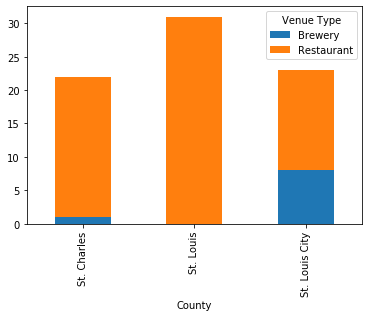

In [268]:
df_venues_final.groupby('County')['Venue Type']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

### Final Map showing locations of Restaurants and Breweries in St. Charles County

In [269]:
county_latitude = Geo.loc[11, 'CENTROID_LATITUDE'] 
county_longitude = Geo.loc[11, 'CENTROID_LONGITUDE'] 
county_name = Geo.loc[11, 'NAME'] 

stc_res_map = folium.Map(location=[county_latitude, county_longitude], zoom_start=11)

# add markers to map
for lat, lng, name, categories in zip(stc['lat'], stc['lng'], stc['name'], stc['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(stc_res_map) 
    
stc_res_map

## Results

As can be seen from the data, there are not many breweries in St. Charles or even St. Louis counties. The number of breweries doesn't increase much until St. Louis City county. With this being the case St. Charles county seems like an excellent county for a new brewery to take off. 

## Discussion

As a recomendation, it seems like it would be wise to choose St. Charles or St. Louis counties to pursue a brewery business. Also, a prime location seems to be along the Missouri River, where there don't seem to be many breweries at the moment. However, if you are wanting a location along a major road, I-40 seems to be the best place for that. Most restaurants are tucked back further from the highway, making a new brewery likely to stand out to passerby. 

## Conclusion

In conclusion, the data obtained from mo.gov was very useful in indicating counties within the state. As well as foursquare for obtaining information about specific venues within the counties. This data was put together to form tables and maps showing where the best locations for future potential breweries might be. Again, it seems that the best locations for a brewery wanting to settle in St. Charles county would be along the Missouri River or I-40. 